In [111]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

In [96]:
df = pd.read_csv('telco.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [97]:
print("Total Missing Values: ",df.isnull().values.any())
df.isnull().sum()

Total Missing Values:  False


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [98]:
ordinal = OrdinalEncoder()
df = ordinal.fit_transform(df)

In [99]:
df = pd.DataFrame(df, columns=["customerID",
"gender",
"SeniorCitizen",
"Partner",
"Dependents",
"tenure",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling",
"PaymentMethod",
"MonthlyCharges",
"TotalCharges",
"Churn"])

In [100]:
X = df[["customerID",
"gender",
"SeniorCitizen",
"Partner",
"Dependents",
"tenure",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling",
"PaymentMethod",
"MonthlyCharges",
"TotalCharges"]]
y = df[['Churn']]

In [101]:
scale = StandardScaler()

scaledX = scale.fit_transform(X)
scaledy = scale.fit_transform(y)


In [102]:
scaledX= df[["customerID",
"gender",
"SeniorCitizen",
"Partner",
"Dependents",
"tenure",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling",
"PaymentMethod",
"MonthlyCharges",
"TotalCharges"]]
scaledy = df[['Churn']]

In [103]:
test_ratio = 0.2
x_train, x_test, y_train, y_test = model_selection.train_test_split(scaledX, scaledy, test_size=test_ratio)

In [104]:
print(x_train, x_test)
print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
4776        12.0     0.0            0.0      1.0         0.0     5.0   
1070      4370.0     0.0            0.0      0.0         0.0     2.0   
2652      3320.0     1.0            0.0      0.0         0.0     1.0   
2625       601.0     1.0            0.0      0.0         0.0    56.0   
2198      6900.0     0.0            0.0      1.0         1.0    17.0   
...          ...     ...            ...      ...         ...     ...   
2685      4091.0     0.0            0.0      1.0         0.0    72.0   
2209      3049.0     1.0            0.0      1.0         0.0     8.0   
3210      6391.0     0.0            0.0      1.0         1.0    64.0   
6719      1721.0     1.0            0.0      1.0         0.0    72.0   
566       4947.0     1.0            0.0      1.0         1.0    15.0   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
4776           1.0            0.0              1.0             0.

In [105]:
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(x_train, np.ravel(y_train,order='C'))
y_pred=log_reg.predict(x_test)

In [106]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[933 104]
 [179 193]]


In [107]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1 Score: ",metrics.f1_score(y_test, y_pred))

Accuracy:  0.7991483321504613
Precision:  0.6498316498316499
Recall:  0.5188172043010753
F1 Score:  0.5769805680119582


In [108]:

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['none','l1', 'l2']}
grid = GridSearchCV(LogisticRegression(random_state=42, solver="liblinear"), param_grid, cv=5)
grid.fit(x_train, np.ravel(y_train,order='C'))
print(grid.best_params_)



{'C': 10, 'penalty': 'l1'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is not

In [109]:
#using the hyperparameter {'C':1, 'penalty':'l1'}
model = LogisticRegression(random_state=42, C=1, penalty='l2')
model.fit(x_train, np.ravel(y_train,order='C'))
# Predicting the test set results using the new model
y_pred = model.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred))
print("F1 Score: ",metrics.f1_score(y_test, y_pred))
# Evaluating the performance of the new model
print(classification_report(y_test, y_pred))


Accuracy:  0.8005677785663591
Precision:  0.6382978723404256
Recall:  0.5645161290322581
F1 Score:  0.5991440798858773
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1037
         1.0       0.64      0.56      0.60       372

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[918 119]
 [162 210]]


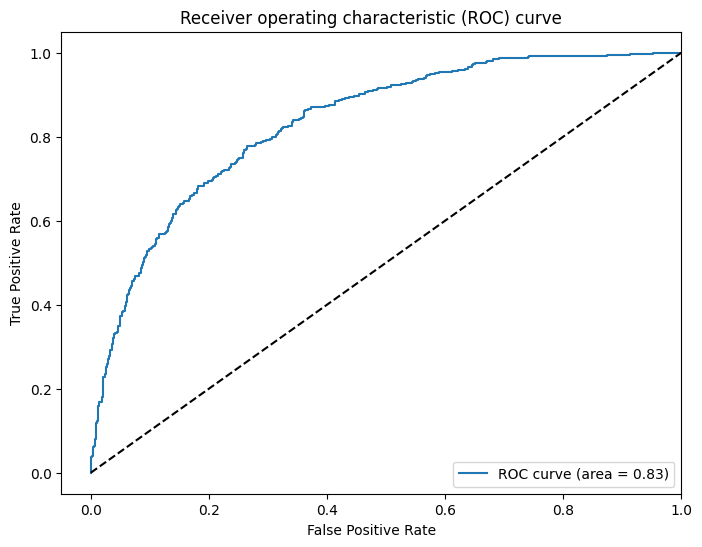

In [110]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# ROC curve
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
